task: analyse the outcome of community detection

 can you try and provide some insight into why the community detection algorithm may not have performed as expected?
 
for this, you may want to go back to your raw and intermediate datasets and run some summary statistics and basic analytics:
```
RATINGS_SMALL_PARQUET = "/FileStore/tables/ratings-small.parquet"
EDGES_SMALL_PARQUET = "/FileStore/tables/edges-small.parquet"
ALL_NODES_SMALL_TEXT = "/FileStore/tables/nodes-small.txt"
ALL_ADJLIST_SMALL_TEXT =  "/FileStore/tables/adjlist-small.txt"
```

for instance: is this a dense/sparse set of ratings? what is the average number of ratings per user? how are users connected in the user-user network?

# your analysis code here

In [3]:
import pandas as pd
import pyspark.sql.functions as f
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#IN 
RATINGS_SMALL_PARQUET = "/FileStore/tables/ratings-small.parquet"
EDGES_SMALL_PARQUET = "/FileStore/tables/edges-small.parquet"
ALL_NODES_SMALL_TEXT = "/FileStore/tables/180571930/nodes-small.txt"
ALL_ADJLIST_SMALL_TEXT =  "/FileStore/tables/180571930/adjlist-small.txt"

In [5]:
# Read the raw data set 
ratings = spark.read.parquet(RATINGS_SMALL_PARQUET)
# ratings.count()
ratings.cache()
display(ratings)

userId,movieId,rating,timestamp
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931
1,70,3.0,964982400
1,101,5.0,964980868
1,110,4.0,964982176
1,151,5.0,964984041
1,157,5.0,964984100


In [6]:
ratings.take(10)

Out[ 5 ]: 
[Row(userId=1, movieId=1, rating=4.0, timestamp=964982703),
 Row(userId=1, movieId=3, rating=4.0, timestamp=964981247),
 Row(userId=1, movieId=6, rating=4.0, timestamp=964982224),
 Row(userId=1, movieId=47, rating=5.0, timestamp=964983815),
 Row(userId=1, movieId=50, rating=5.0, timestamp=964982931),
 Row(userId=1, movieId=70, rating=3.0, timestamp=964982400),
 Row(userId=1, movieId=101, rating=5.0, timestamp=964980868),
 Row(userId=1, movieId=110, rating=4.0, timestamp=964982176),
 Row(userId=1, movieId=151, rating=5.0, timestamp=964984041),
 Row(userId=1, movieId=157, rating=5.0, timestamp=964984100)]

In [7]:
ratings.describe().show()

+-------+------------------+----------------+------------------+--------------------+
summary| userId| movieId| rating| timestamp|
+-------+------------------+----------------+------------------+--------------------+
 count| 100836| 100836| 100836| 100836|
 mean|326.12756356856676|19435.2957177992| 3.501556983616962|1.2059460873684695E9|
 stddev| 182.6184914635004|35530.9871987003|1.0425292390606342|2.1626103599513078E8|
 min| 1| 1| 0.5| 828124615|
 max| 610| 193609| 5.0| 1537799250|
+-------+------------------+----------------+------------------+--------------------+

In [8]:
# 1. Dense or sparse set of ratings?
ratings.createOrReplaceTempView("ratings_sql")

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-1831929281545894> in <module> () 
 1 # create table so we can use SQL 
 ----> 2 ratings . createOrReplaceTempView ( "ratings_sql" ) 

 NameError : name 'ratings' is not defined

In [9]:
%sql  /* Check the size of the ratings matrix   */
select *, nb_ratings/matrix_size*100 as percentage
from (
  select *, nb_users*nb_movies as matrix_size
  from (
    select count(distinct(userId)) as nb_users, count(distinct(movieId)) as nb_movies, count(*) as nb_ratings
    from ratings_sql
  )
  )

In [10]:
# sparse matrix: Less than 2% of the matrix is filled.

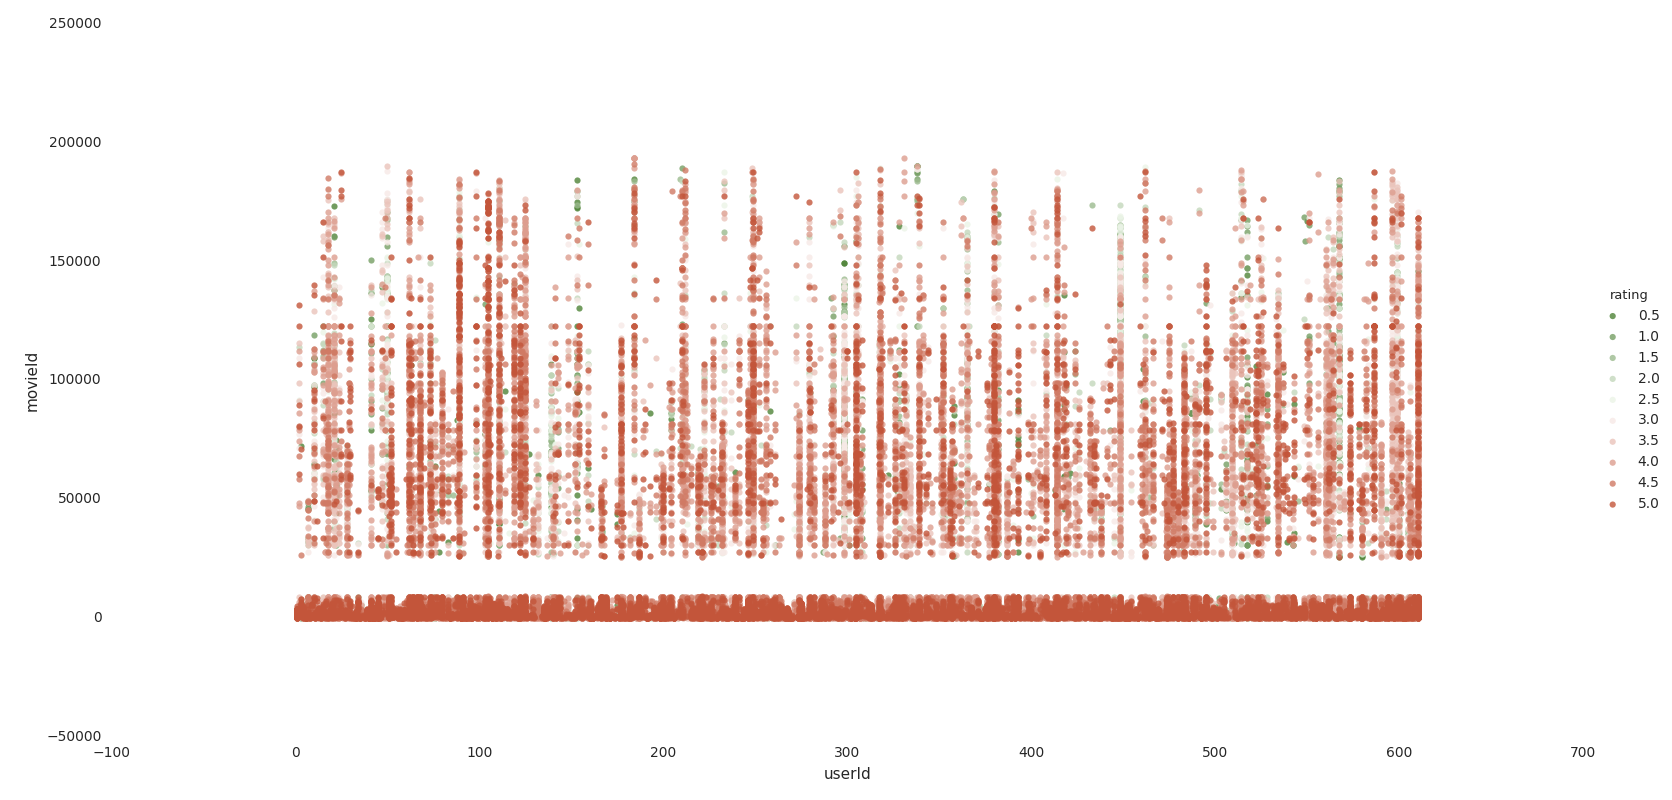

In [11]:
ratings_DF = ratings.toPandas()

lm = sns.lmplot(x='userId', y='movieId', hue='rating', data=ratings_DF, fit_reg=False, 
                size=8, aspect=2, palette=sns.diverging_palette(120, 20, sep=20, n=10, 
                center="light"))
display(plt.show())

In [12]:
# a gap in data, some values are missing

In [13]:
# 2. The average number of ratings per user
avgRating = ratings.groupBy('userId').mean('rating').sort('avg(rating)',ascending=False) # (movieId, avg)
display(avgRating)

userId,avg(rating)
53,5.0
251,4.869565217391305
515,4.846153846153846
25,4.8076923076923075
30,4.735294117647059
523,4.693333333333333
348,4.672727272727273
171,4.634146341463414
452,4.556930693069307
43,4.552631578947368


In [14]:
countMovieDict = ratings.rdd.map(lambda x: x[0]).countByValue()
countMovieRdd = sc.parallelize([countMovieDict]).flatMap(lambda x: x.items())
countMovie = sqlContext.createDataFrame(countMovieRdd, ['userId', 'movieCount'])
display(countMovie)

userId,movieCount
1,232
2,29
3,39
4,216
5,44
6,314
7,152
8,47
9,46
10,140


In [15]:
avgRating = avgRating.toPandas()
countMovie = countMovie.toPandas()
avgRating.merge(countMovie)

In [16]:
# 3. How are users connected in the user-user network?

In [17]:
# Replace this funtion in task 3
def p_get_top_k_edges_with_highest_betweenness(sc, graph, k):
  shortest_paths_rdd = compute_shortest_paths(sc, graph)
  edge_betweenness_rdd = compute_edge_betweenness(shortest_paths_rdd)
  top_k_betweenness = edge_betweenness_rdd.sortBy(lambda x: x[1], ascending=False).take(k)
  # print("top_k_betweenness" + str(top_k_betweenness.collect()))
  print("top_k_betweenness" + str(top_k_betweenness.take(100)))
  top_k_edges = list(map(lambda x: x[0],top_k_betweenness))
  return top_k_edges


Out[ 16 ]: DataFrame[userId1: int, userId2: int, weight: double]

The algorithm's steps for community detection are summarized below

1. The betweenness of all existing edges in the network is calculated first.<br>
2. The edge with the highest betweenness is removed.<br>
3. The betweenness of all edges affected by the removal is recalculated.<br>
4. Steps 2 and 3 are repeated until no edges remain.<br><br>

Each time detect a new community, show the top_k_betweenness to observe the network connection between users.